# Defining the problem statement: 
#### Create a Predictive model which can tell if a member will default or not?



* loan_status=0,  Non-Defaulter member
* loan_status=1, Defaulter memeber

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Magin function for in-line display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

# Customising default values to view all columns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
# pd.set_option('display.max_rows',1000)


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

# Load the library for splitting the data
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [3]:
# Read the three datasets

train = pd.read_csv("./train_indessa.csv", encoding="latin_1")
test = pd.read_csv("./test_indessa.csv", encoding="latin_1")
submission = pd.read_csv("./sample_submission.csv", encoding="latin_1")

In [4]:
print("Shape of Train dataset : ", train.shape)
print("Shape of Test dataset : ", test.shape)
print("Shape of Submission dataset : ", submission.shape)

Shape of Train dataset :  (532428, 45)
Shape of Test dataset :  (354951, 44)
Shape of Submission dataset :  (100, 2)


## Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the survival of the passenger?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [5]:
train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [6]:
print('Shape before deleting duplicate values:', train.shape)

# Removing duplicate rows if any
train = train.drop_duplicates()
print('Shape After deleting duplicate values:', train.shape)


Shape before deleting duplicate values: (532428, 45)
Shape After deleting duplicate values: (532428, 45)


### Checking concise summary of dataset
To know the features and their corresponding data types, along with finding whether they contain null values or not.

In [7]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  object 
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    354951 non-null  int64  
 1   loan_amnt                    354951 non-null  int64  
 2   funded_amnt                  354951 non-null  int64  
 3   funded_amnt_inv              354951 non-null  float64
 4   term                         354951 non-null  object 
 5   batch_enrolled               309352 non-null  object 
 6   int_rate                     354951 non-null  float64
 7   grade                        354951 non-null  object 
 8   sub_grade                    354951 non-null  object 
 9   emp_title                    334322 non-null  object 
 10  emp_length                   337017 non-null  object 
 11  home_ownership               354951 non-null  object 
 12  annual_inc                   354950 non-null  float64
 13 

## Columns Names Meaning:

* **dti** - debt-to-income ratio - Ratio of member's total monthly debt, repayment excluding mortgage divided by self, reported monthly income. Borrowers with a higher debt-to-income ratio are more likely to run into trouble making monthly payments. 

* **delinq_2yrs** - number of 30+ days delinquency in last 2 years - Credit card delinquency occurs when a cardholder falls behind on making required monthly payments. 30 days late is generally considered delinquent.

* **open_acc** - number of open credit line in member's credit line- A line of credit (LOC) is a preset borrowing limit that can be used at any time. The borrower can take money out as needed until the limit is reached, and as money is repaid, it can be borrowed again in the case of an open line of credit. An open credit is a financial arrangement between a lender and a borrower that allows the latter to access credit repeatedly up to a specific maximum limit. Once the borrower starts making repayments to the account, the money becomes available for withdrawal again since it is a revolving fund. 

* **pub_rec** - number of derogatory public records - A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts borrower ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.

* **revol_bal** - total credit revolving balance - In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle.

* **revol_util** - amount of credit a member is using relative to revol_bal

* **total_acc** - total number of credit lines available in members credit line

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,532428.0,3.500547e+07,2.412148e+07,70473.00,10866882.50,37095895.00,5.848920e+07,73544841.00
loan_amnt,532428.0,1.475760e+04,8.434420e+03,500.00,8000.00,13000.00,2.000000e+04,35000.00
funded_amnt,532428.0,1.474427e+04,8.429139e+03,500.00,8000.00,13000.00,2.000000e+04,35000.00
funded_amnt_inv,532428.0,1.470493e+04,8.441290e+03,0.00,8000.00,13000.00,2.000000e+04,35000.00
int_rate,532428.0,1.324297e+01,4.379611e+00,5.32,9.99,12.99,1.620000e+01,28.99
annual_inc,532425.0,7.502984e+04,6.519985e+04,1200.00,45000.00,65000.00,9.000000e+04,9500000.00
dti,532428.0,1.813877e+01,8.369074e+00,0.00,11.93,17.65,2.395000e+01,672.52
delinq_2yrs,532412.0,3.144482e-01,8.600449e-01,0.00,0.00,0.00,0.000000e+00,30.00
inq_last_6mths,532412.0,6.946031e-01,9.970255e-01,0.00,0.00,0.00,1.000000e+00,31.00
mths_since_last_delinq,259874.0,3.405573e+01,2.188480e+01,0.00,15.00,31.00,5.000000e+01,180.00


## Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

0    406601
1    125827
Name: loan_status, dtype: int64


0    0.763673
1    0.236327
Name: loan_status, dtype: float64


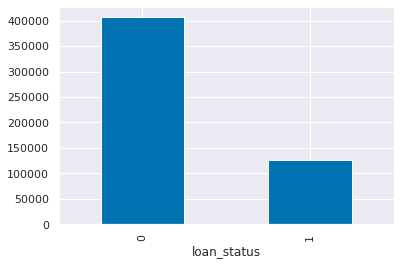

In [10]:
print(train['loan_status'].value_counts())
print('\n')
print(train['loan_status'].value_counts(normalize=True))

# train['loan_status'].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
# plt.title("Defaulter and Non-Defaulter Distribution",fontsize=20)
# plt.legend(["Defaulter", "Non-Defaulter"])
# plt.show()

# # Looking at the distribution of Target variable
# * When performing Classification, make sure there is a balance in the the distribution of each class 
# otherwise it impacts the Machine Learning algorithms ability to learn all the classes

# Creating Bar chart as the Target variable is Categorical
GroupedData = train.groupby('loan_status').size()
GroupedData.plot(kind='bar', figsize=(6,4));

# concatenate train and test set

In [11]:
# concatenate train and test set
train['TrainTest'] = 1
test['TrainTest'] = 0
test['loan_status'] = 3
data = pd.concat([train,test])
data.reset_index(inplace = True , drop = True)

In [12]:
# # Relationship between applied loan amount vs sanctioned amount by bank vs sanctioned by investor
# plt.figure(figsize=(12,10))
# sns.scatterplot(x='loan_amnt', y='funded_amnt', hue='funded_amnt_inv', data=train);

In [13]:
# Extract number from column 'last_week_pay' and 'term'
data['last_week_pay'] = data['last_week_pay'].str.extract(r'([\d]+)',expand=False)
data['term'] = data['term'].str.extract(r'([\d]+)',expand=False)
data['emp_length'] = data['emp_length'].str.extract(r'([\d]+)',expand=False)

## Removing useless columns from the data

Deleting those columns which are not useful in predictive analysis because these variables are qualitative

In [14]:
useless_predictor = ['batch_enrolled','zip_code','title','purpose','emp_title','grade',
                  'sub_grade','addr_state','inq_last_6mths']

## Deleting those columns which are not useful in predictive analysis because these variables are qualitative

data = data.drop(useless_predictor,axis=1)
print(data.shape)

(887379, 37)


# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [15]:
# ## Finding the the count and percentage of values that are missing in the dataframe.
# train_null = pd.DataFrame({'Count': train.isnull().sum(), 'Percent': 100*train.isnull().sum()/len(train)})

# ##printing columns with null count more than 0
# train_null[train_null['Count'] > 0].sort_values(by='Percent', ascending=False)


## Finding the the count and percentage of values that are missing in the dataframe.
data_null = pd.DataFrame({'Count': data.isnull().sum(), 'Percent': 100*data.isnull().sum()/len(data)})

##printing columns with null count more than 0
data_null[data_null['Count'] > 0].sort_values(by='Percent', ascending=False)

,Count,Percent
verification_status_joint,886868,99.942415
desc,761599,85.825673
mths_since_last_record,750326,84.555303
mths_since_last_major_derog,665676,75.015974
mths_since_last_delinq,454312,51.197065
total_rev_hi_lim,70276,7.919502
tot_cur_bal,70276,7.919502
tot_coll_amt,70276,7.919502
emp_length,44825,5.051393
last_week_pay,17659,1.990018


We can see that there are a lot of features which have lot of data missing. These featues may not be necessary for our analysis. The following part will drop any columns where 80% or more data is missing. This will help us clean the Dataset a little bit.

Actually there is no ideal way to deal with missing data. However handling missing values is an essential preprocessing task that can drastically deteriorate our model when not done with sufficient care.

Before starting handling missing values it is important to identify the missing values and know with which value they are replaced. Possible variations of missing values are: ‘NaN’, ‘NA’, ‘None’, ‘ ’, ‘?’ and others.

In [16]:
NotNullData = data.dropna(axis=1, thresh=int(0.50*len(data)))
NotNullData.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,TrainTest
0,58189336,14350,14350,14350.0,36,19.19,9,OWN,28700.0,Source Verified,n,33.88,0.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26,0.0,0.0,28699.0,30800.0,0,1
1,70011223,4800,4800,4800.0,36,10.99,1,MORTGAGE,65000.0,Source Verified,n,3.64,0.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,0.0,9974.0,32900.0,0,1
2,70255675,10000,10000,10000.0,36,7.26,2,OWN,45000.0,Not Verified,n,18.42,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9,0.0,65.0,38295.0,34900.0,0,1
3,1893936,15000,15000,15000.0,36,19.72,10,RENT,105000.0,Not Verified,n,14.97,0.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135,0.0,0.0,55564.0,24700.0,0,1
4,7652106,16000,16000,16000.0,36,10.64,10,RENT,52000.0,Verified,n,20.16,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96,0.0,0.0,47159.0,47033.0,0,1


In [17]:
# Replacing missing values of Age with median value
NotNullData['tot_coll_amt'].fillna(NotNullData['tot_coll_amt'].median(), inplace=True)
NotNullData['tot_cur_bal'].fillna(NotNullData['tot_cur_bal'].median(), inplace=True)
NotNullData['total_rev_hi_lim'].fillna(NotNullData['total_rev_hi_lim'].median(), inplace=True)
NotNullData['emp_length'].fillna(NotNullData['emp_length'].median(), inplace=True)
NotNullData['last_week_pay'].fillna(NotNullData['last_week_pay'].median(), inplace=True)

# Replacing missing values of emp_length with Mode value
# NotNullData['batch_enrolled'].fillna(NotNullData['batch_enrolled'].mode()[0], inplace=True)
# NotNullData['emp_title'].fillna(NotNullData['emp_title'].mode()[0], inplace=True)

# Deleting the missing value rows if there are only few records
NotNullData.dropna(inplace=True)

/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-17-d1586cd527f9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData.dropna(inplace=True)


In [18]:
# Finding how many missing values are there for each column
NotNullData.isnull().sum().max()

0

In [19]:
NotNullData.shape

(886764, 32)

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>PassengerId</b>: Qualitative. Rejected.
* <b>Survived</b>: Categorical. Selected. This is the <b>Target Variable!</b>
* <b>Pclass</b>: Categorical. Selected.
* <b>Name</b>: Qualitative. Rejected. Your name does not save you from dying!!
* <b>Sex</b>: Categorical. Selected.
* <b>Age</b>: Continuous. Selected.
* <b>SibSp</b>: Categorical. Selected.
* <b>Parch</b>: Categorical. Selected.
* <b>Ticket</b>: Qualitative. Rejected.
* <b>Fare</b>: Continuous. Selected.
* <b>Cabin</b>: Qualitative. Rejected. Also, this has too many missing values!
* <b>Embarked</b>: Categorical. Selected.

In [20]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are <20 then the variable is likely to be a category otherwise continuous
NotNullData.nunique().sort_values()

TrainTest                          2
application_type                   2
initial_list_status                2
term                               2
pymnt_plan                         2
loan_status                        3
verification_status                3
home_ownership                     6
acc_now_delinq                     8
emp_length                        11
collections_12_mths_ex_med        12
delinq_2yrs                       29
pub_rec                           32
open_acc                          76
last_week_pay                     98
total_acc                        135
int_rate                         542
revol_util                      1356
funded_amnt                     1372
loan_amnt                       1372
dti                             4086
total_rec_late_fee              6131
funded_amnt_inv                 9850
tot_coll_amt                   10323
collection_recovery_fee        20652
total_rev_hi_lim               21248
recoveries                     23008
a

In [21]:
NotNullData.shape

(886764, 32)

In [22]:
categorical_predictor = ['loan_status', 'application_type','initial_list_status','pymnt_plan',
                         'verification_status','home_ownership']

continous_predictor = ['term','delinq_2yrs','pub_rec','open_acc','last_week_pay','total_acc','collections_12_mths_ex_med',
                       'int_rate','revol_util','funded_amnt','loan_amnt','dti','total_rec_late_fee',
                       'funded_amnt_inv','tot_coll_amt','collection_recovery_fee','recoveries','acc_now_delinq',
                       'total_rev_hi_lim','annual_inc','revol_bal','total_rec_int','tot_cur_bal','emp_length']



In [23]:
len(categorical_predictor)

6

In [24]:
len(continous_predictor)

24

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 
'Pclass', 'Sex', 'SibSp','Parch','Embarked'

We use bar charts to see how the data is distributed for these categorical columns.

In [25]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    length = len(colsToPlot)
    nrow = ((length//3) + (1 if (length%3)>0 else 0))
    fig, subPlot = plt.subplots(nrows=nrow, ncols=3, figsize=(20,6*nrow))

    for colName, plotNumber in zip(colsToPlot, range(13)):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber//3,plotNumber%3], rot=35,title=colName)

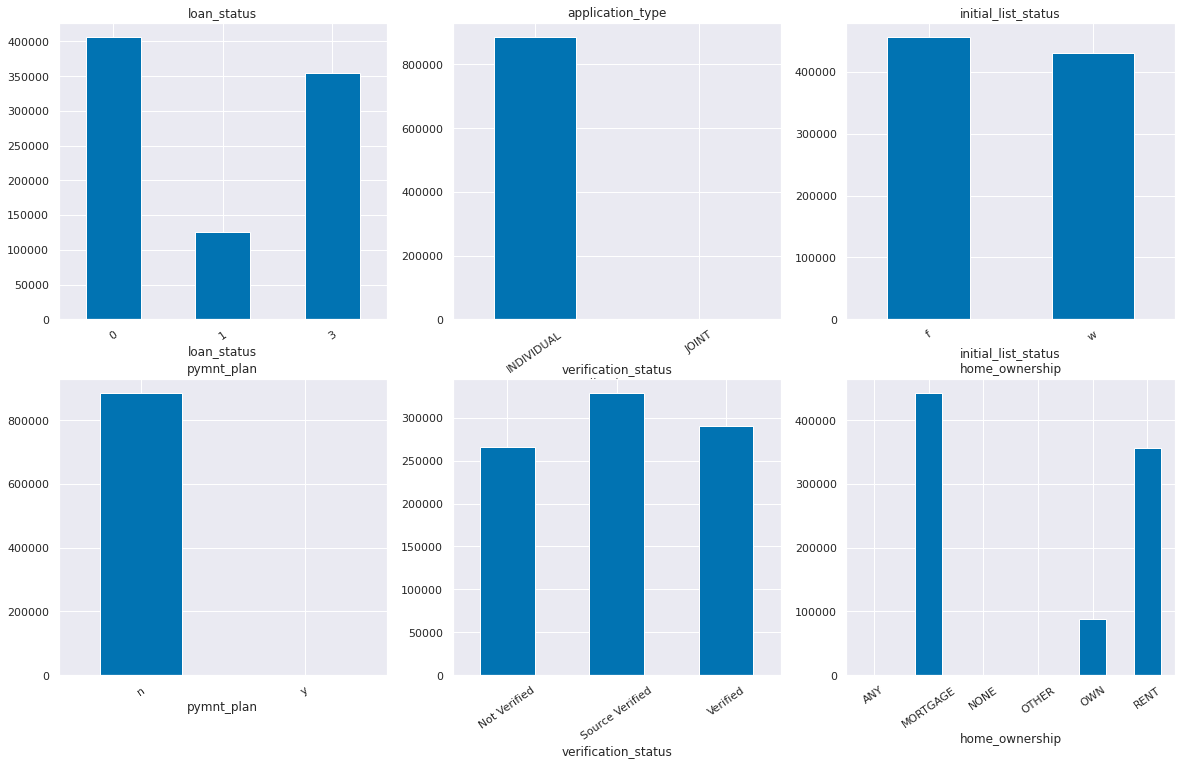

In [26]:
# Calling the function

PlotBarCharts(inpData=NotNullData, colsToPlot=categorical_predictor)

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'Pclass', 'Sex', 'SibSp','Parch','Embarked'

In [27]:
NotNullData['home_ownership'].value_counts()

MORTGAGE    443270
RENT        355870
OWN          87397
OTHER          180
NONE            44
ANY              3
Name: home_ownership, dtype: int64

In [28]:
NotNullData['home_ownership'][(NotNullData['home_ownership'] == 'NONE') | 
                                 (NotNullData['home_ownership'] == 'ANY')] = 'OTHER'

<ipython-input-28-5c0003fabb2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['home_ownership'][(NotNullData['home_ownership'] == 'NONE') |
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are two continuous predictor variables 'Age',and 'Fare'

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

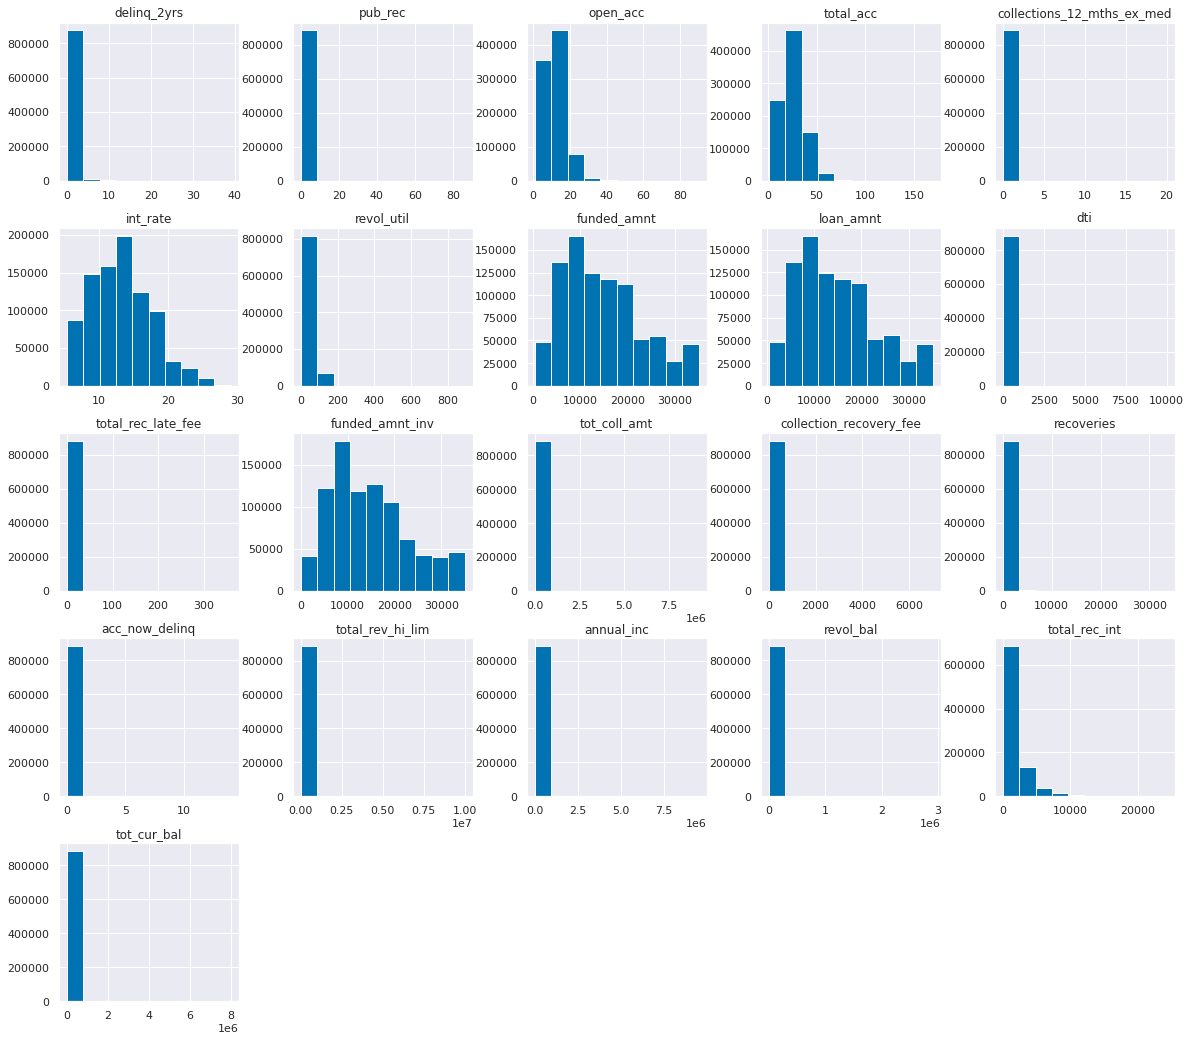

In [29]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
NotNullData.hist(continous_predictor, figsize=(20,18));

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 175 rows in data that has a age between 20 to 30.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Age</b> : Selected. The distribution is good.
* <b>Fare</b>: Selected. Outliers seen beyond 300, need to treat them.

# Outlier treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

In [30]:
# Observing the relationship with Target variable again after Outlier treatment
# You can see that the distribution has improved now
# trainCleanData.boxplot(column='open_acc', by='loan_status', figsize=(10,8), vert=True)

In [31]:
NotNullData[(NotNullData['loan_status']==1) & (NotNullData['delinq_2yrs']>5)]['delinq_2yrs'].shape

(310,)

In [32]:
# Finding nearest values to 10 mark
NotNullData['delinq_2yrs'][NotNullData['delinq_2yrs']<5].sort_values(ascending=False)

648568    4.0
91327     4.0
829751    4.0
294502    4.0
442153    4.0
         ... 
561214    0.0
561213    0.0
561212    0.0
561211    0.0
0         0.0
Name: delinq_2yrs, Length: 880467, dtype: float64

Above result shows the nearest logical value is 9.0, hence, replacing any value above 10 with it

In [33]:
# Replacing outliers with nearest possibe value
NotNullData['delinq_2yrs'][NotNullData['delinq_2yrs']>5] = .0

<ipython-input-33-768059c5ba75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['delinq_2yrs'][NotNullData['delinq_2yrs']>5] = .0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [34]:
# Finding nearest values to 10 mark
NotNullData['pub_rec'][NotNullData['pub_rec']<10].sort_values(ascending=False)

704393    9.0
80850     9.0
583193    9.0
313529    9.0
421349    9.0
         ... 
508852    0.0
508851    0.0
508850    0.0
508849    0.0
887378    0.0
Name: pub_rec, Length: 886632, dtype: float64

In [35]:
# Replacing outliers with nearest possibe value
NotNullData['pub_rec'][NotNullData['pub_rec']>10] = 9.0

<ipython-input-35-ed4bee874215>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['pub_rec'][NotNullData['pub_rec']>10] = 9.0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [36]:
# Finding nearest values to 10 mark
NotNullData['open_acc'][NotNullData['open_acc']<40].sort_values(ascending=False)

520403    39.0
749514    39.0
129510    39.0
710823    39.0
130169    39.0
          ... 
545726     1.0
694549     1.0
816171     1.0
502380     1.0
440709     1.0
Name: open_acc, Length: 886004, dtype: float64

In [37]:
# Replacing outliers with nearest possibe value
NotNullData['open_acc'][NotNullData['open_acc']>40] = 39.0

<ipython-input-37-90b3d4d5b830>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['open_acc'][NotNullData['open_acc']>40] = 39.0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [38]:
# Finding nearest values to 10 mark
NotNullData['total_acc'][NotNullData['total_acc']<80].sort_values(ascending=False)

465584    79.0
398624    79.0
638879    79.0
532622    79.0
277797    79.0
          ... 
102411     1.0
431031     1.0
146123     1.0
503747     1.0
274025     1.0
Name: total_acc, Length: 886043, dtype: float64

In [39]:
# Replacing outliers with nearest possibe value
NotNullData['total_acc'][NotNullData['total_acc']>80] = 79.0

<ipython-input-39-67c5c04199db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['total_acc'][NotNullData['total_acc']>80] = 79.0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [40]:
NotNullData[(NotNullData['loan_status']==1) & (NotNullData['revol_util']>120)]['revol_util'].shape

(4,)

In [41]:
# Finding nearest values to 10 mark
NotNullData['revol_util'][NotNullData['revol_util']<120].sort_values(ascending=False)

59825     119.8
592571    119.7
395179    119.7
169115    119.6
252712    119.4
          ...  
746190      0.0
746176      0.0
599816      0.0
285932      0.0
678672      0.0
Name: revol_util, Length: 886669, dtype: float64

In [42]:
# Replacing outliers with nearest possibe value
NotNullData['revol_util'][NotNullData['revol_util']>120] = 119.0

<ipython-input-42-9f9bc431a771>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['revol_util'][NotNullData['revol_util']>120] = 119.0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [43]:
NotNullData[(NotNullData['loan_status']==1) & (NotNullData['dti']>50)]['dti'].shape

(1,)

In [44]:
# Finding nearest values to 10 mark
NotNullData['dti'][NotNullData['dti']<50].sort_values(ascending=False)

863792    48.91
80381     48.56
115012    48.48
502326    47.61
279099    47.31
          ...  
648003     0.00
103380     0.00
345395     0.00
676636     0.00
182356     0.00
Name: dti, Length: 886720, dtype: float64

In [45]:
# Replacing outliers with nearest possibe value
NotNullData['dti'][NotNullData['dti']>50] = 48.56

<ipython-input-45-8b5f904304ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['dti'][NotNullData['dti']>50] = 48.56
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


# tot_coll_amt
# collection_recovery_fee
# total_rec_late_fee
# recoveries

In [46]:
NotNullData[(NotNullData['loan_status']==1) & (NotNullData['total_rev_hi_lim']>100000)]['total_rev_hi_lim'].shape

(2394,)

In [47]:
# Finding nearest values to 10 mark
NotNullData['total_rev_hi_lim'][NotNullData['total_rev_hi_lim']<100000].sort_values(ascending=False)

705585    99985.0
262420    99922.0
255023    99920.0
466067    99905.0
330292    99904.0
           ...   
600285      100.0
508928      100.0
437316        0.0
740963        0.0
632240        0.0
Name: total_rev_hi_lim, Length: 861692, dtype: float64

In [48]:
# Replacing outliers with nearest possibe value
NotNullData['total_rev_hi_lim'][NotNullData['total_rev_hi_lim']>100000] = 99922.0

<ipython-input-48-5ff07da3b2ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['total_rev_hi_lim'][NotNullData['total_rev_hi_lim']>100000] = 99922.0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [49]:
NotNullData[(NotNullData['loan_status']==1) & (NotNullData['annual_inc']>200000)]['revol_util'].shape

(2088,)

In [50]:
# Finding nearest values to 10 mark
NotNullData['annual_inc'][NotNullData['annual_inc']<200000].sort_values(ascending=False)

38575     199999.0
202563    199992.0
164334    199956.0
775       199956.0
236778    199900.0
            ...   
160800      1896.0
566025      1770.0
331505      1200.0
818829         0.0
615622         0.0
Name: annual_inc, Length: 866738, dtype: float64

In [51]:
# Replacing outliers with nearest possibe value
NotNullData['annual_inc'][NotNullData['annual_inc']>200000] = 199999.0

<ipython-input-51-b9f245a71763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['annual_inc'][NotNullData['annual_inc']>200000] = 199999.0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [52]:
NotNullData[(NotNullData['loan_status']==1) & (NotNullData['revol_bal']>75000)]['revol_bal'].shape

(1559,)

In [53]:
# Finding nearest values to 10 mark
NotNullData['revol_bal'][NotNullData['revol_bal']<75000].sort_values(ascending=False)

567240    74998.0
257893    74988.0
547672    74984.0
469426    74983.0
50922     74982.0
           ...   
556641        0.0
107359        0.0
589246        0.0
518466        0.0
648237        0.0
Name: revol_bal, Length: 873302, dtype: float64

In [54]:
# Replacing outliers with nearest possibe value
NotNullData['revol_bal'][NotNullData['revol_bal']>75000] = 74988.0

<ipython-input-54-72e1e80471cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['revol_bal'][NotNullData['revol_bal']>75000] = 74988.0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [55]:
NotNullData[(NotNullData['loan_status']==1) & (NotNullData['total_rec_int']>10000)]['total_rec_int'].shape

(1247,)

In [56]:
# Finding nearest values to 10 mark
NotNullData['total_rec_int'][NotNullData['total_rec_int']<10000].sort_values(ascending=False)

462125    9999.81
646235    9999.64
92230     9999.49
681504    9999.25
500698    9999.22
           ...   
789388       0.00
848698       0.00
524042       0.00
112970       0.00
341301       0.00
Name: total_rec_int, Length: 876969, dtype: float64

In [57]:
# Replacing outliers with nearest possibe value
NotNullData['total_rec_int'][NotNullData['total_rec_int']>10000] = 9999.81

<ipython-input-57-3187a69e0ea5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['total_rec_int'][NotNullData['total_rec_int']>10000] = 9999.81
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [58]:
NotNullData[(NotNullData['loan_status']==1) & (NotNullData['tot_cur_bal']>500000)]['tot_cur_bal'].shape

(2743,)

In [59]:
# Finding nearest values to 10 mark
NotNullData['tot_cur_bal'][NotNullData['tot_cur_bal']<500000].sort_values(ascending=False)

351857    499974.0
526947    499973.0
255492    499967.0
110365    499964.0
372173    499955.0
            ...   
575402         0.0
459611         0.0
202863         0.0
664013         0.0
751227         0.0
Name: tot_cur_bal, Length: 863651, dtype: float64

In [60]:
# Replacing outliers with nearest possibe value
NotNullData['tot_cur_bal'][NotNullData['tot_cur_bal']>500000] = 499974.0

<ipython-input-60-ff8008f8695b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NotNullData['tot_cur_bal'][NotNullData['tot_cur_bal']>500000] = 499974.0
/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


# Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

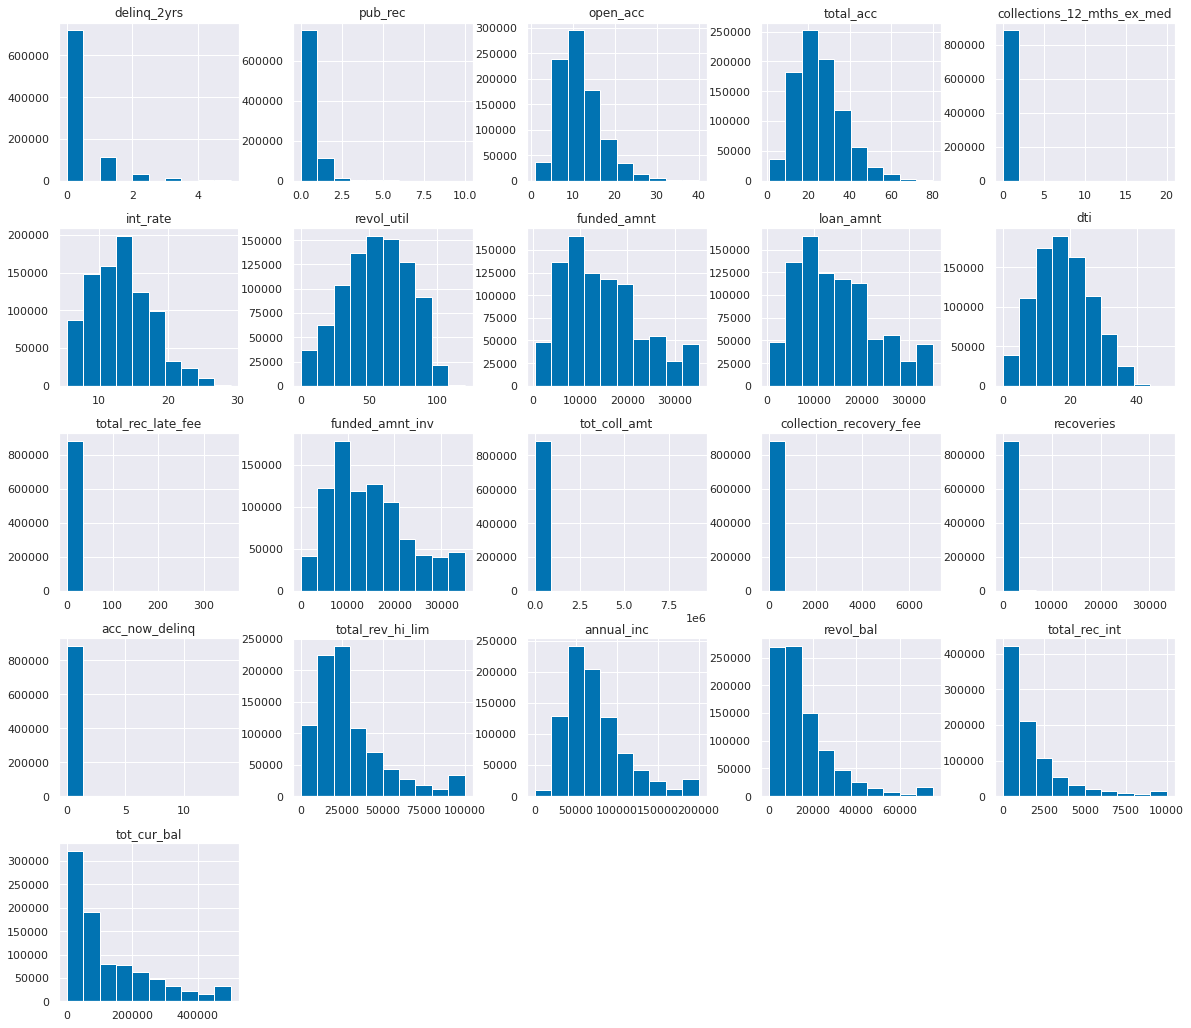

In [61]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
NotNullData.hist(continous_predictor, figsize=(20,18));

In [62]:
# trainCleanData['delinq_2yrs'].hist();

In [63]:
# trainCleanData[trainCleanData['delinq_2yrs']<5]['delinq_2yrs'].hist();

In [64]:
# trainCleanData['term'].value_counts()

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [65]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [66]:
# Calling the function to check which categorical variables are correlated with target
FunctionAnova(inpData=NotNullData, TargetVariable='loan_status', ContinuousPredictorList=continous_predictor)

##### ANOVA Results ##### 

term is correlated with loan_status | P-Value: 0.0
delinq_2yrs is correlated with loan_status | P-Value: 7.496352224082371e-249
pub_rec is correlated with loan_status | P-Value: 2.149955878045385e-301
open_acc is correlated with loan_status | P-Value: 0.0
last_week_pay is correlated with loan_status | P-Value: 0.0
total_acc is NOT correlated with loan_status | P-Value: 0.26534861648739666
collections_12_mths_ex_med is correlated with loan_status | P-Value: 1.67764181469883e-131
int_rate is NOT correlated with loan_status | P-Value: 0.09797751009972747
revol_util is correlated with loan_status | P-Value: 3.932136235845422e-259
funded_amnt is correlated with loan_status | P-Value: 0.0
loan_amnt is correlated with loan_status | P-Value: 0.0
dti is correlated with loan_status | P-Value: 0.0
total_rec_late_fee is correlated with loan_status | P-Value: 0.002561098377556999
funded_amnt_inv is correlated with loan_status | P-Value: 0.0
tot_coll_amt is correlated wit

['term',
 'delinq_2yrs',
 'pub_rec',
 'open_acc',
 'last_week_pay',
 'collections_12_mths_ex_med',
 'revol_util',
 'funded_amnt',
 'loan_amnt',
 'dti',
 'total_rec_late_fee',
 'funded_amnt_inv',
 'tot_coll_amt',
 'collection_recovery_fee',
 'recoveries',
 'acc_now_delinq',
 'total_rev_hi_lim',
 'annual_inc',
 'revol_bal',
 'total_rec_int',
 'tot_cur_bal',
 'emp_length']

## Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [67]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [68]:
# Calling the function
FunctionChisq(inpData=NotNullData, 
              TargetVariable='loan_status',
              CategoricalVariablesList= categorical_predictor)

loan_status is correlated with loan_status | P-Value: 0.0
application_type is correlated with loan_status | P-Value: 1.4876129290319924e-20
initial_list_status is correlated with loan_status | P-Value: 0.0
pymnt_plan is NOT correlated with loan_status | P-Value: 0.43217633115169873
verification_status is correlated with loan_status | P-Value: 0.0
home_ownership is correlated with loan_status | P-Value: 1.874269157615969e-109


['loan_status',
 'application_type',
 'initial_list_status',
 'verification_status',
 'home_ownership']

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [69]:
SelectedColumns=['member_id',
                 'delinq_2yrs',
 'pub_rec',
 'open_acc',
 'last_week_pay',
 'total_acc',
 'int_rate',
 'revol_util',
 'funded_amnt',
 'loan_amnt',
 'dti',
 'total_rec_late_fee',
 'funded_amnt_inv',
 'tot_coll_amt',
 'collection_recovery_fee',
 'recoveries',
 'total_rev_hi_lim',
 'annual_inc',
 'revol_bal',
 'total_rec_int',
 'tot_cur_bal',
 'application_type',
 'term',
 'initial_list_status',
 'verification_status',
 'home_ownership',
 'acc_now_delinq',
 'collections_12_mths_ex_med',
 'emp_length',
'loan_status','TrainTest']

# Selecting final columns
DataForML=NotNullData[SelectedColumns]
DataForML.head()

,member_id,delinq_2yrs,pub_rec,open_acc,last_week_pay,total_acc,int_rate,revol_util,funded_amnt,loan_amnt,dti,total_rec_late_fee,funded_amnt_inv,tot_coll_amt,collection_recovery_fee,recoveries,total_rev_hi_lim,annual_inc,revol_bal,total_rec_int,tot_cur_bal,application_type,term,initial_list_status,verification_status,home_ownership,acc_now_delinq,collections_12_mths_ex_med,emp_length,loan_status,TrainTest
0,58189336,0.0,1.0,14.0,26,28.0,19.19,73.1,14350,14350,33.88,0.0,14350.0,0.0,0.0,0.0,30800.0,28700.0,22515.0,1173.84,28699.0,INDIVIDUAL,36,f,Source Verified,OWN,0.0,0.0,9,0,1
1,70011223,0.0,0.0,6.0,9,13.0,10.99,23.2,4800,4800,3.64,0.0,4800.0,0.0,0.0,0.0,32900.0,65000.0,7624.0,83.95,9974.0,INDIVIDUAL,36,w,Source Verified,MORTGAGE,0.0,0.0,1,0,1
2,70255675,0.0,0.0,5.0,9,19.0,7.26,31.2,10000,10000,18.42,0.0,10000.0,65.0,0.0,0.0,34900.0,45000.0,10877.0,56.47,38295.0,INDIVIDUAL,36,w,Not Verified,OWN,0.0,0.0,2,0,1
3,1893936,0.0,0.0,10.0,135,21.0,19.72,55.5,15000,15000,14.97,0.0,15000.0,0.0,0.0,0.0,24700.0,105000.0,13712.0,4858.62,55564.0,INDIVIDUAL,36,f,Not Verified,RENT,0.0,0.0,10,0,1
4,7652106,0.0,0.0,11.0,96,27.0,10.64,76.2,16000,16000,20.16,0.0,16000.0,0.0,0.0,0.0,47033.0,52000.0,35835.0,2296.41,47159.0,INDIVIDUAL,36,w,Verified,RENT,0.0,0.0,10,0,1


In [70]:
DataForML.shape

(886764, 31)

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [71]:
# DataForML.nunique().sort_values()

In [72]:
# Converting the binary nominal variable sex to numeric
DataForML['initial_list_status'].replace({'w':0, 'f':1}, inplace=True)

/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [73]:
# Converting the binary nominal variable sex to numeric
DataForML['application_type'].replace({'JOINT':0, 'INDIVIDUAL':1}, inplace=True)

In [74]:
DataForML['verification_status'] = DataForML['verification_status'].map({'Not Verified': 1,
                                                                         'Verified': 2,
                                                                         'Source Verified': 3})

<ipython-input-74-9db9a4714c5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['verification_status'] = DataForML['verification_status'].map({'Not Verified': 1,


In [75]:
DataForML['home_ownership'] = DataForML['home_ownership'].map({'OTHER':0,
                                                               'OWN': 1,
                                                               'RENT': 2,
                                                               'MORTGAGE': 3})

<ipython-input-75-20f03eaebcc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['home_ownership'] = DataForML['home_ownership'].map({'OTHER':0,


In [76]:
DataForML['collections_12_mths_ex_med'].value_counts()

0.0     875086
1.0      10821
2.0        732
3.0         88
4.0         23
5.0          7
6.0          2
7.0          1
20.0         1
16.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [77]:
# DataForML.head(15).T

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

In [78]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize the Variables
scaler = StandardScaler()

DataForML.iloc[:,1:-2] = scaler.fit_transform(DataForML.iloc[:,1:-2])
DataForML.head()

/home/dinesh/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,member_id,delinq_2yrs,pub_rec,open_acc,last_week_pay,total_acc,int_rate,revol_util,funded_amnt,loan_amnt,dti,total_rec_late_fee,funded_amnt_inv,tot_coll_amt,collection_recovery_fee,recoveries,total_rev_hi_lim,annual_inc,revol_bal,total_rec_int,tot_cur_bal,application_type,term,initial_list_status,verification_status,home_ownership,acc_now_delinq,collections_12_mths_ex_med,emp_length,loan_status,TrainTest
0,58189336,-0.403163,1.464110,0.463995,-0.726118,0.232027,1.356539,0.757412,-0.046825,-0.048376,1.896413,-0.096897,-0.042188,-0.021006,-0.077292,-0.112052,0.044073,-1.149474,0.461075,-0.284835,-0.797727,0.024012,-0.654845,0.971023,1.137627,-2.114652,-0.064278,-0.107171,0.844833,0,1
1,70011223,-0.403163,-0.353652,-1.049636,-1.113241,-1.039831,-0.514838,-1.338398,-1.179858,-1.180662,-1.745797,-0.096897,-1.173700,-0.021006,-0.077292,-0.112052,0.139634,-0.204361,-0.591521,-0.848289,-0.944989,0.024012,-0.654845,-1.029842,1.137627,0.904545,-0.064278,-0.107171,-1.476454,0,1
2,70255675,-0.403163,-0.353652,-1.238840,-1.113241,-0.531088,-1.366086,-1.002397,-0.562918,-0.564130,0.034357,-0.096897,-0.557589,-0.014439,-0.077292,-0.112052,0.230644,-0.725085,-0.361577,-0.862495,-0.722260,0.024012,-0.654845,-1.029842,-1.311391,-2.114652,-0.064278,-0.107171,-1.186293,0,1
3,1893936,-0.403163,-0.353652,-0.292821,1.756022,-0.361506,1.477493,0.018209,0.030293,0.028690,-0.381173,-0.096897,0.034826,-0.021006,-0.077292,-0.112052,-0.233508,0.837086,-0.161181,1.620129,-0.586449,0.024012,-0.654845,0.971023,-1.311391,-0.605054,-0.064278,-0.107171,1.134994,0,1
4,7652106,-0.403163,-0.353652,-0.103617,0.867917,0.147237,-0.594714,0.887613,0.148935,0.147254,0.243929,-0.096897,0.153309,-0.021006,-0.077292,-0.112052,0.782758,-0.542831,1.402622,0.295513,-0.652550,0.024012,-0.654845,-1.029842,-0.086882,-0.605054,-0.064278,-0.107171,1.134994,0,1


## After data preprocess, again split the data into train and test set

In [79]:
train = DataForML[DataForML['TrainTest'] == 1]
test = DataForML[DataForML['TrainTest'] == 0]

train = train.drop(['member_id','TrainTest'], axis=1)
test = test.drop(['loan_status','TrainTest'], axis=1)

print(train.shape, "  ", test.shape)

(532065, 29)    (354699, 29)


# Machine Learning
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [80]:
# Separate Target Variable and Predictor Variables
TargetVariable = 'loan_status'
Predictors = train.columns[:-1]

X = train[Predictors].values
y = train[TargetVariable].values

# # Split the data into training and testing set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [81]:

# # Choose either standardization or Normalization
# # On this data Min Max Normalization produced better results

# # Choose between standardization and MinMAx normalization
# #PredictorScaler=StandardScaler()
# PredictorScaler = MinMaxScaler()

# # Storing the fit object for later reference
# PredictorScalerFit = PredictorScaler.fit(X)

# # Generating the standardized values of X
# X = PredictorScalerFit.transform(X)

In [90]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(372445, 28)
(372445,)
(159620, 28)
(159620,)


## Build Various Models & choose best one

In [92]:
model_lst = []
accuracy_lst = []
auc_lst = []

# Logistic Regression

In [86]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# Logistic Regression
model_lst.append('Logistic Regression')

log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

lr = GridSearchCV(LogisticRegression(), log_reg_params)
lr.fit(X_train, y_train)
y_pred_log_reg = lr.predict(X_test)

# Logistic Regression best estimator
print("Logistic Regression best estimator : \n",lr.best_estimator_)

# calculate accuracy
acc_log_reg = round( metrics.accuracy_score(y_pred_log_reg , y_test) * 100, 2)
accuracy_lst.append(acc_log_reg)

# calculate auc
Aucs = metrics.roc_auc_score(y_test , y_pred_log_reg)
auc_lst.append(Aucs)

# calculate precision
PrecisionScore = metrics.precision_score(y_test , y_pred_log_reg)

# calculate recall
RecallScore = metrics.recall_score(y_test , y_pred_log_reg)

# calculate f1 score
F1Score = metrics.f1_score(y_test , y_pred_log_reg)

# draw confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_log_reg)

print("Model Name : Logistic Regression")
print('Accuracy :{0:0.2f} %'.format(acc_log_reg)) 
print('AUC : {0:0.2f}'.format(Aucs))
print('Precision : {0:0.2f}'.format(PrecisionScore))
print('Recall : {0:0.2f}'.format(RecallScore))
print('F1 : {0:0.2f}'.format(F1Score))
print('Confusion Matrix : \n', cnf_matrix)
print("\n")

In [87]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [88]:
y_pred = logreg.predict(X_test)


print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.78803
AUC : 0.60083
Precision : 0.63004
Recall : 0.24633
F1 : 0.35418


AUC -  0.6008286342220696 



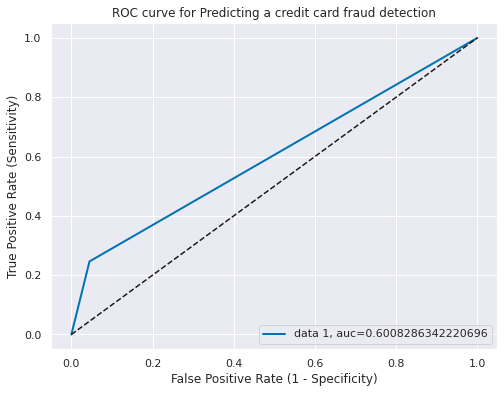

In [89]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()